In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/StudentsPerformance.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

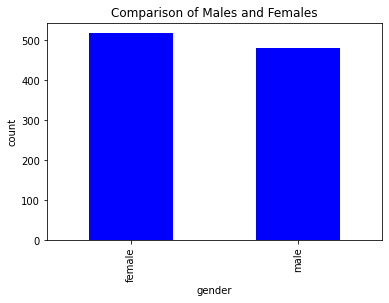

In [6]:
data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'blue')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

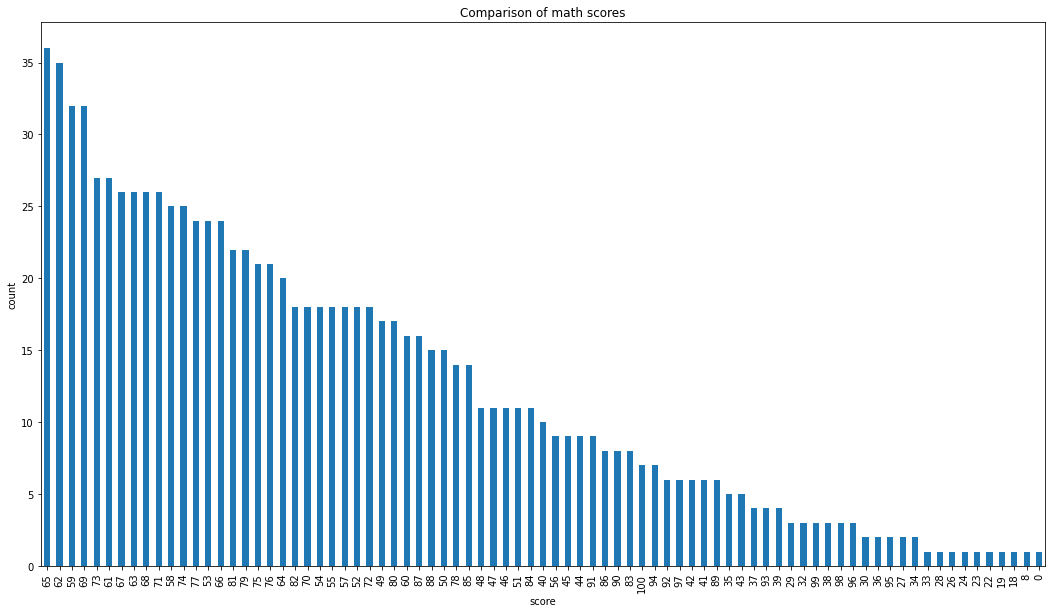

In [7]:
data['math score'].value_counts(normalize = True)
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

In [8]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

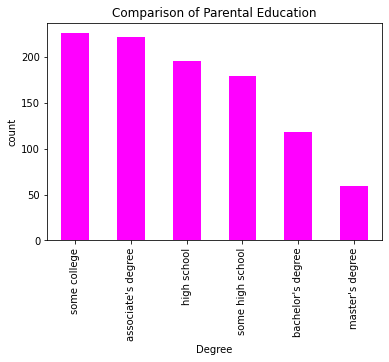

In [10]:
data['parental level of education'].value_counts(normalize = True)
data['parental level of education'].value_counts(dropna = False).plot.bar(color='magenta')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

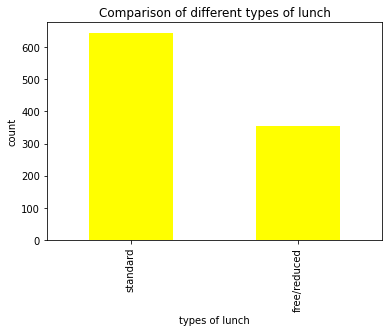

In [11]:
data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

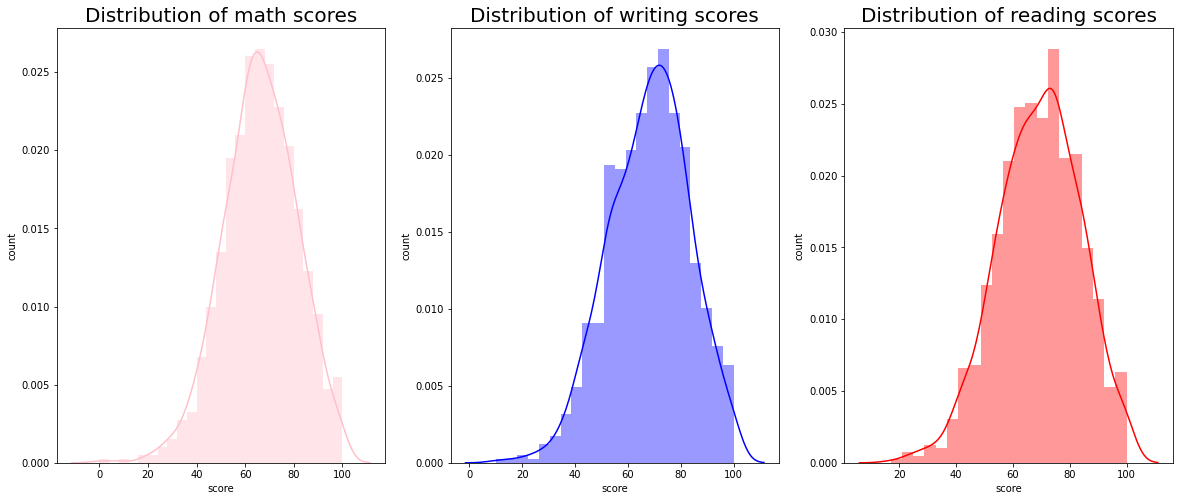

In [12]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(data['math score'], color = 'pink')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(data['writing score'], color = 'blue')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(data['reading score'], color = 'red')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

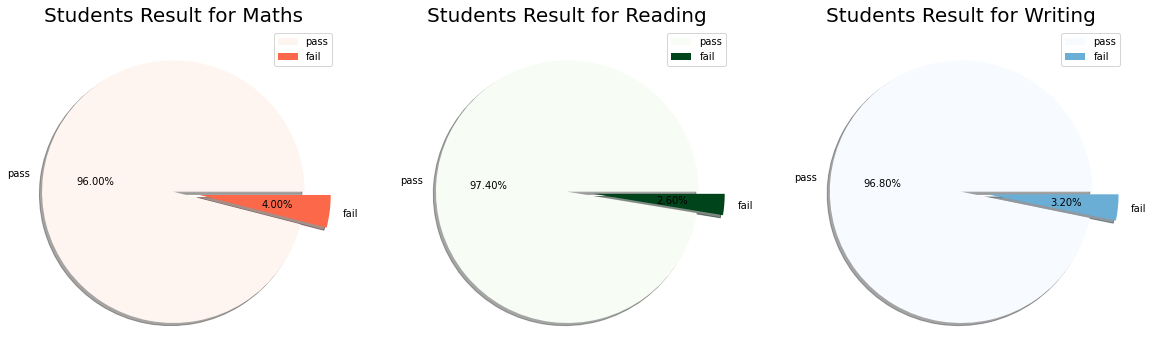

In [13]:
# feature engineering on the data to visualize and solve the dataset more accurately

passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')


size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


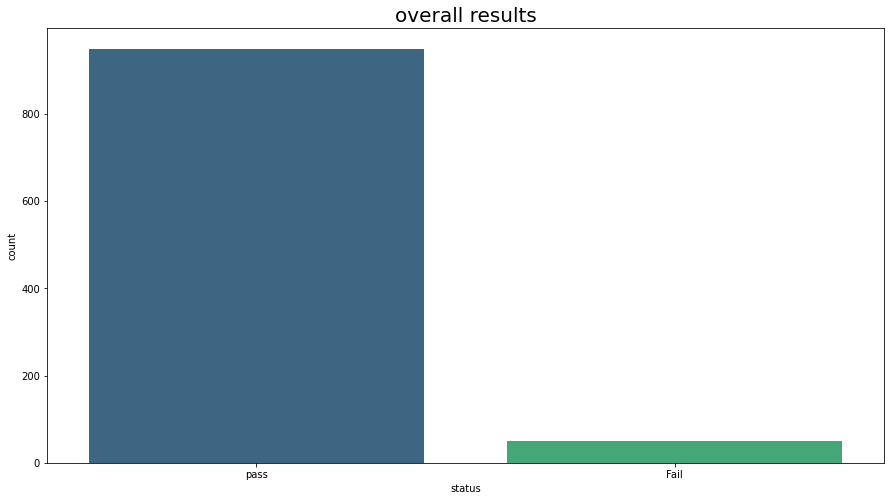

In [15]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['status'], palette = 'viridis')
plt.title('overall results', fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Correlations between the attributes')

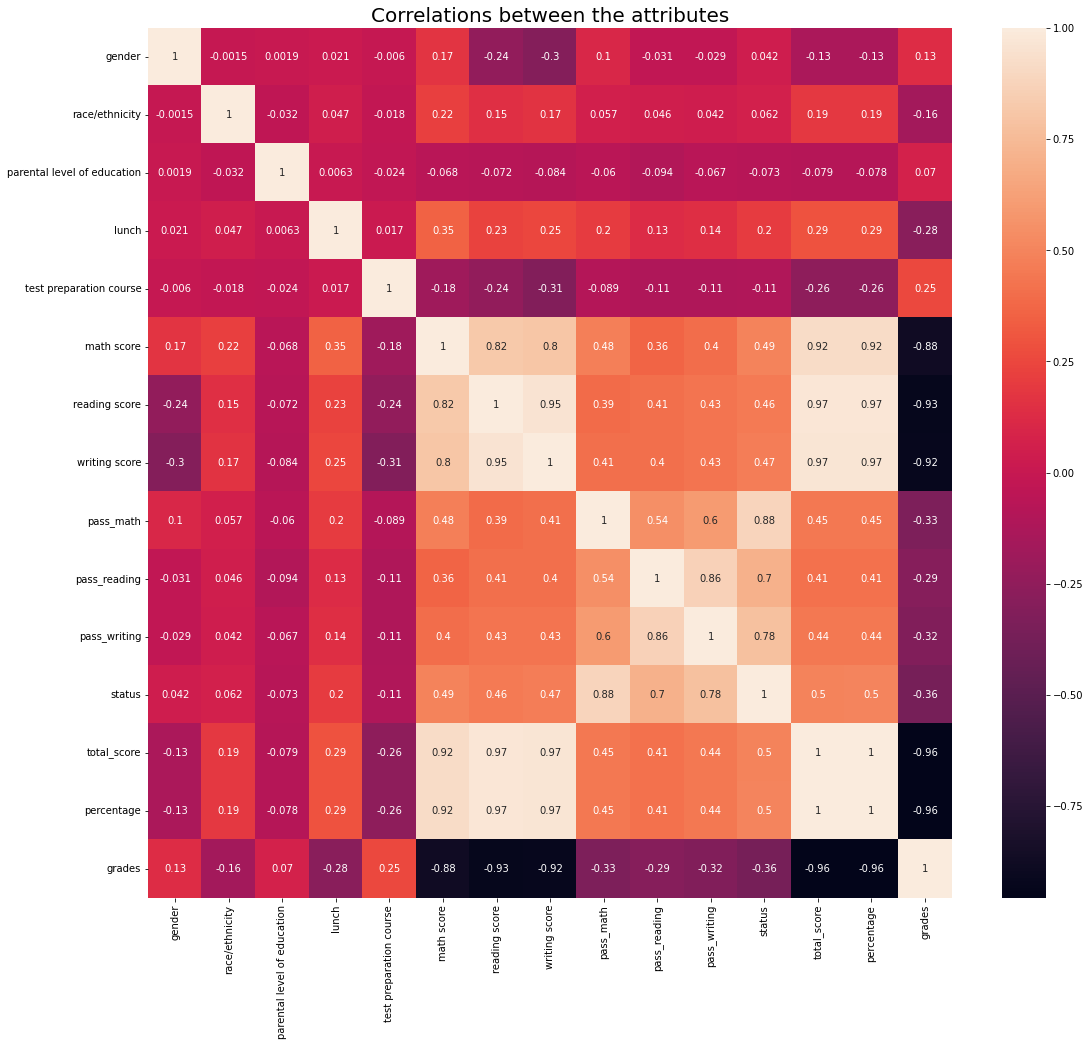

In [33]:
plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(data.corr(), annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


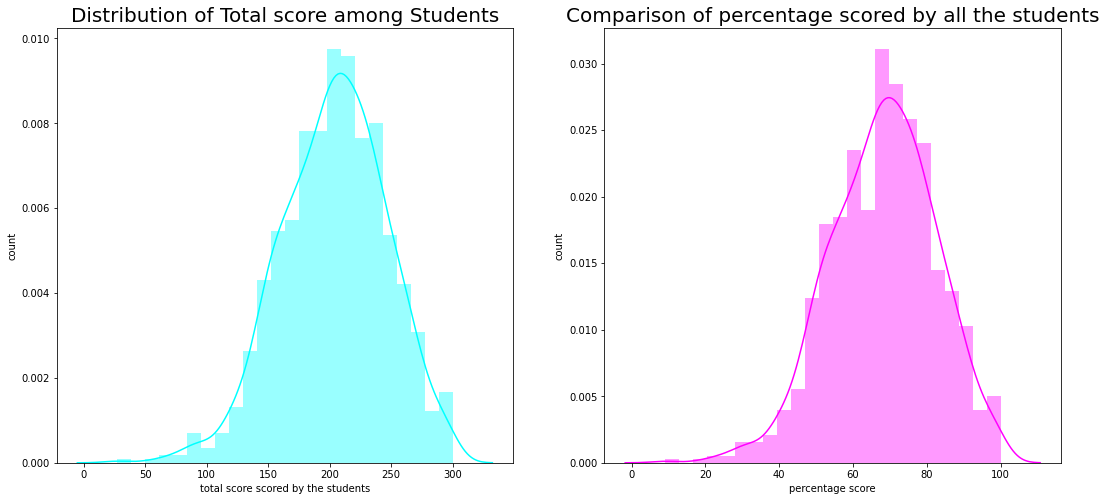

In [19]:
  # computing the total score for each student

from math import * 
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.distplot(data['total_score'], color = 'cyan')
plt.title('Distribution of Total score among Students', fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.distplot(data['percentage'], color = 'magenta')
plt.title('Comparison of percentage scored by all the students', fontsize = 20)
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

plt.show()

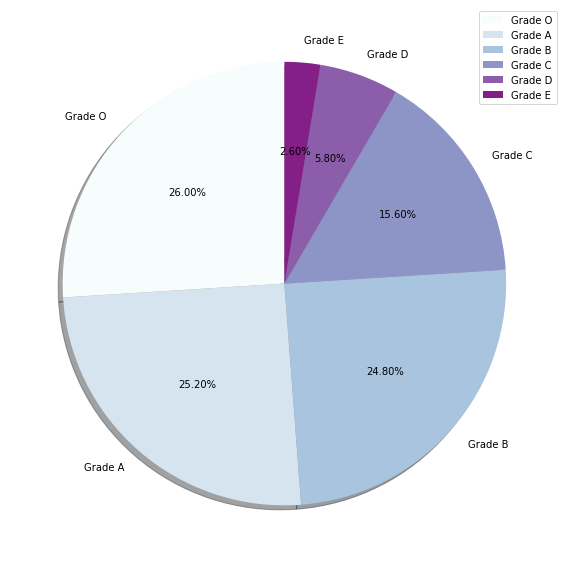

In [20]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )


labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = data['grades'].value_counts()
colors = plt.cm.BuPu(np.linspace(0, 1, 7))
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

plt.pie(sizes, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])
data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

In [22]:
x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

Logistic Regression

Training Accuracy : 0.848
Testing Accuracy : 0.808


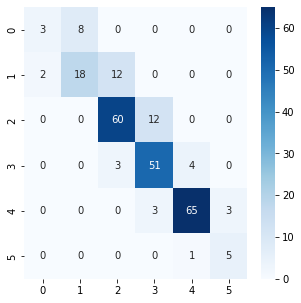

In [29]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression(max_iter = 1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.992


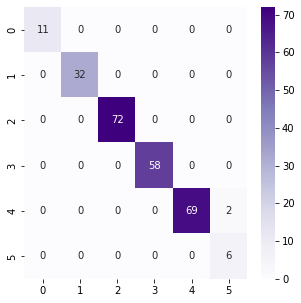

In [28]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')

Support Vector Machine

In [32]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))



Training Accuracy : 0.916
Testing Accuracy : 0.852
